# COVID-19

### Importo Librerias

In [1]:
#pip install sodapy

In [2]:
import pandas as pd
import numpy as np
#from sodapy import Socrata
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import datetime as dt
import plotly_express as px

### Conecto con la API

In [3]:
#client = Socrata("healthdata.gov", None)
#results = client.get("g62h-syeh",limit=100000000000000000000,timeout=100000)
#df = pd.DataFrame.from_records(results)
#api caidaaaaaa
df=pd.read_csv('COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv')

In [4]:
df.head()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,VT,2020/10/16,1,15,1,1,15,1,0.0,16,...,NaN,0,NaN,0,0.0,1,19.0,1,33.0,1
1,VI,2020/10/15,1,1,0,2,0,0,0.0,2,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,PR,2020/10/14,9,49,7,9,49,7,0.0,64,...,NaN,0,NaN,0,0.0,1,4.0,1,15.0,1
3,VI,2020/10/13,1,1,0,2,0,0,0.0,2,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
4,AL,2020/10/10,33,79,2,35,77,2,13.0,112,...,NaN,0,NaN,0,0.0,8,0.0,8,0.0,8


In [5]:
# veo el tamaño
df.shape

(47585, 135)

### El análisis solicitado, debe contemplar los datos hasta el 01/08/2022 inclusive.

In [6]:
#convierto columna date a formato datetime
df.date = pd.to_datetime(df.date)

In [7]:
df = df[df.date<='2022-08-01']

### Limpieza de datos

In [8]:
#convierto columnas numericas a formato numerico
df_numeric = df.drop(columns=['state','date'])
for i in df_numeric.columns:
    df_numeric[i] = pd.to_numeric(df_numeric[i])

In [9]:
df = df[['state','date']].join(df_numeric)

In [10]:
#lleno los nan con 0 sin no hay reporte supongo que no hay casos que informar
df.fillna(value=0,inplace=True)

In [11]:
df.head()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,VT,2020-10-16,1,15,1,1,15,1,0.0,16,...,0.0,0,0.0,0,0.0,1,19.0,1,33.0,1
1,VI,2020-10-15,1,1,0,2,0,0,0.0,2,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
2,PR,2020-10-14,9,49,7,9,49,7,0.0,64,...,0.0,0,0.0,0,0.0,1,4.0,1,15.0,1
3,VI,2020-10-13,1,1,0,2,0,0,0.0,2,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
4,AL,2020-10-10,33,79,2,35,77,2,13.0,112,...,0.0,0,0.0,0,0.0,8,0.0,8,0.0,8


## 1 - ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo). ¿Influye el rango etario en este comportamiento?

In [12]:
#necesito estado, ocupacion cama comun, cantidad de camas con pacientes confirmados, fecha, rango etario.
#para rango etario hago analisis de admisiones por rango etario
#me parece que trabajar solo con casos confirmados (no sospechosos) es lo mas confiable
#como no hay datos anteriores a ene/2020, solo filtro hasta jun/2020
ocupacion_hospitalaria = ['state','date','inpatient_beds_used_covid']

In [13]:
semestre_1_2020 = df[df.date<'2020-07']

In [14]:
ocupacion = semestre_1_2020[ocupacion_hospitalaria]

In [15]:
#total de camas ocupadas
total_camas_ocupadas = ocupacion.inpatient_beds_used_covid.sum()

In [16]:
#agrupo por estado y sumo valores
ocupacion_por_estado = ocupacion.groupby('state').sum().sort_values('inpatient_beds_used_covid', ascending=False)

In [17]:
ocupacion_por_estado['percentage'] = ocupacion_por_estado * 100/ total_camas_ocupadas

In [18]:
ocupacion_por_estado.head(5)

,inpatient_beds_used_covid,percentage
state,,
NY,686528.0,15.529708
CA,434721.0,9.833670
FL,322227.0,7.288983
TX,246237.0,5.570040
IL,214010.0,4.841045


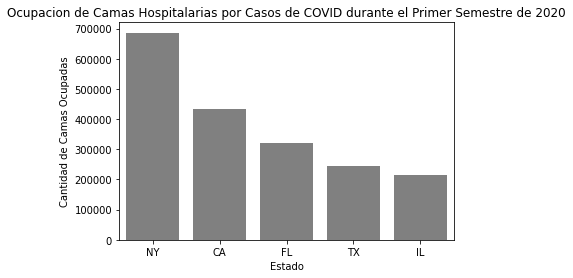

In [19]:
fig = sns.barplot(x=ocupacion_por_estado.head(5).index,y=ocupacion_por_estado.head(5).inpatient_beds_used_covid,color='grey')
fig.set(title='Ocupacion de Camas Hospitalarias por Casos de COVID durante el Primer Semestre de 2020',xlabel='Estado',ylabel='Cantidad de Camas Ocupadas');

Los 5 estados con mayor cantidad de camas hospitalarias ocupadas por COVID durante los primeros 6 meseses de 2020 fueron NY, CA, FL, TX e IL.

#### Influye el rango etario?

In [20]:
#separo columnas que distinguen edad
cols = ['previous_day_admission_pediatric_covid_confirmed',
'previous_day_admission_adult_covid_confirmed_18-19',
'previous_day_admission_adult_covid_confirmed_20-29',
'previous_day_admission_adult_covid_confirmed_30-39',
'previous_day_admission_adult_covid_confirmed_40-49',
'previous_day_admission_adult_covid_confirmed_50-59',
'previous_day_admission_adult_covid_confirmed_60-69',
'previous_day_admission_adult_covid_confirmed_70-79',
'previous_day_admission_adult_covid_confirmed_80+']

In [21]:
rangos_semestre_1 = semestre_1_2020[cols]

In [22]:
#sumo las internaciones por rangos etarios para ver si la edad influye
rangos_semestre_1.sum().index

Index(['previous_day_admission_pediatric_covid_confirmed',
       'previous_day_admission_adult_covid_confirmed_18-19',
       'previous_day_admission_adult_covid_confirmed_20-29',
       'previous_day_admission_adult_covid_confirmed_30-39',
       'previous_day_admission_adult_covid_confirmed_40-49',
       'previous_day_admission_adult_covid_confirmed_50-59',
       'previous_day_admission_adult_covid_confirmed_60-69',
       'previous_day_admission_adult_covid_confirmed_70-79',
       'previous_day_admission_adult_covid_confirmed_80+'],
      dtype='object')

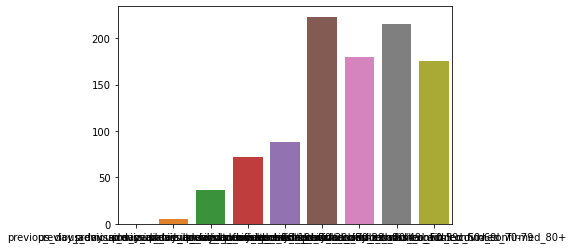

In [23]:
plt = sns.barplot(x=rangos_semestre_1.sum().index,y=rangos_semestre_1.sum().values)

La cantidad de internaciones en el 1er semestre de 2020 fue muy superior en los rangos etarios mas eleveados.

##  2 - Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:



*   Intervalos de crecimiento y decrecimiento
*   Puntos críticos (mínimos y máximos)




La cuarentena en el Estado de Nueva York estuvo establecida desde 2020-03-22 hasta 2020-06-13

In [24]:
ny = df[df.state=='NY']

In [25]:
ny_cuarentena = ny[('2020-03-22'<=ny.date) & (ny.date<'2020-06-13')]

In [26]:
#hay registros duplicados?
ny_cuarentena.duplicated().sum()

0

In [27]:
#Me quedo con las columnas que me interesan
ny_cuarentena = ny_cuarentena[['date','inpatient_beds_used_covid']]

In [28]:
ny_cuarentena.set_index(ny_cuarentena.date,inplace=True,drop=True)

In [29]:
ny_cuarentena.sort_index(inplace=True)

In [30]:
#borro la columna date que quedo duplicada
ny_cuarentena.drop(columns='date',inplace=True)

In [31]:
#punto maximo y minimo
ny_cuarentena.sort_values('inpatient_beds_used_covid')


,inpatient_beds_used_covid
date,
2020-03-22,324.0
2020-03-23,417.0
2020-03-24,554.0
2020-03-25,843.0
2020-03-26,992.0
...,...
2020-04-16,13419.0
2020-04-12,13443.0
2020-04-13,13909.0


El punto maximo de ocupacion se dio el 14/ABR con 14126 camas ocupadas y el punto minimo el 22/MAR con 324 camas ocupadas.

In [32]:
f = px.line(x=ny_cuarentena.index,y=ny_cuarentena.inpatient_beds_used_covid,labels={
                     "x": "Fecha",
                     "y": "Cantidad de Camas Ocupadas"},title='Camas Hospitalarias Ocupadas durante la Cuarentena en el Estado de New York')
f.show()

## 3 - ¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.

In [33]:
#registros de 2020
df_2020 = df[df.date.dt.year==2020]

In [34]:
#columnas de icu
icu_columnas = ['date','state','staffed_pediatric_icu_bed_occupancy','staffed_adult_icu_bed_occupancy']

In [35]:
icu_2020 = df_2020[icu_columnas]

In [36]:
#columna total con la suma de icu pediatria y adultos
icu_2020['total_icu'] = icu_2020['staffed_pediatric_icu_bed_occupancy'] + icu_2020['staffed_adult_icu_bed_occupancy']

C:\Users\jalil\AppData\Local\Temp\ipykernel_14224\1332636350.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
#agrupo por estado y sumo
icu_2020.groupby('state').sum().sort_values('total_icu', ascending=False)[['total_icu']].head(5)

,total_icu
state,
CA,1123211.0
TX,1047029.0
FL,895664.0
NY,633266.0
PA,567704.0


Los 5 estados que mas camas ICU utilizaron durante el 2020 en terminos absolutos fueron CA, TX, FL, NY y PA

## 4 - ¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?

In [38]:
#me sirve el df del punto anterior
cols = ['date','state','staffed_icu_pediatric_patients_confirmed_covid']

In [39]:
icu_ped_2020 = df_2020[cols]

In [40]:
#sumo por estado
icu_ped_2020.groupby('state').sum()

,staffed_icu_pediatric_patients_confirmed_covid
state,
AK,38.0
AL,39.0
AR,406.0
AZ,625.0
CA,989.0
CO,191.0
CT,11.0
DC,245.0
DE,2.0


## 5 - ¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.

In [41]:
#utilizo las columnas anteriores pero para el dataset completo, utilizo la informacion de adultos, que estan mas completas
cols = ['state','staffed_pediatric_icu_bed_occupancy','staffed_adult_icu_bed_occupancy','staffed_icu_pediatric_patients_confirmed_covid','staffed_icu_adult_patients_confirmed_covid']

In [42]:
icu = df[cols]

In [43]:
#creo columna icu total (adultos + ped)
icu['icu_total'] =  icu.staffed_pediatric_icu_bed_occupancy + icu.staffed_adult_icu_bed_occupancy
icu['icu_covid'] = icu.staffed_icu_pediatric_patients_confirmed_covid + icu.staffed_icu_adult_patients_confirmed_covid

C:\Users\jalil\AppData\Local\Temp\ipykernel_14224\2679592073.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jalil\AppData\Local\Temp\ipykernel_14224\2679592073.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
#obtengo porcentajes
icu['icu_covid_percentage'] = icu['icu_covid'] * 100 / icu['icu_total']

C:\Users\jalil\AppData\Local\Temp\ipykernel_14224\2572732417.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
#agrupo por estado y promedio
icu.groupby('state').mean()[['icu_covid_percentage']]

,icu_covid_percentage
state,
AK,NaN
AL,NaN
AR,19.361574
AS,0.100100
AZ,21.329925
CA,16.474464
CO,17.949789
CT,11.009879
DC,NaN


In [46]:
icu.describe()

,staffed_pediatric_icu_bed_occupancy,staffed_adult_icu_bed_occupancy,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_covid,icu_total,icu_covid,icu_covid_percentage
count,47423.000000,47423.000000,47423.000000,47423.000000,47423.000000,47423.000000,4.014000e+04
mean,155.902010,953.854691,1.070578,193.746726,1109.756700,194.817304,inf
std,300.406672,1283.030836,4.140251,382.706020,1519.663114,383.426963,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,118.000000,0.000000,9.000000,142.000000,10.000000,6.250000e+00
50%,48.000000,547.000000,0.000000,61.000000,637.000000,62.000000,1.265339e+01
75%,179.000000,1258.000000,0.000000,214.000000,1330.000000,215.000000,2.488446e+01
max,2580.000000,41473.000000,88.000000,4926.000000,41473.000000,4926.000000,inf


Hay estados que no informaron pacientes en ICU, yo lo interpreto como si no hubiera, al dividir para obtener porcentajes ese denominador 0 genera un NaN.

## 6 - ¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?

In [47]:
#filtro por año
df_2021 = df[df.date.dt.year==2021]

In [48]:
cols = ['state','deaths_covid']

In [49]:
deaths_2021 = df_2021[cols]

In [50]:
deaths_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19475 entries, 88 to 46601
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         19475 non-null  object 
 1   deaths_covid  19475 non-null  float64
dtypes: float64(1), object(1)
memory usage: 456.4+ KB


In [51]:
#agrupo por estado y sumo
deaths_2021.groupby('state').sum().sort_values(by='deaths_covid')

,deaths_covid
state,
AS,0.0
VI,44.0
VT,131.0
ND,334.0
HI,445.0
WY,496.0
NH,520.0
DC,532.0
DE,562.0


## 7 - ¿Qué relación presenta la falta de personal médico, con la cantidad de muertes por covid durante el año 2021?

In [52]:
#columnas que me interesan
cols = ['deaths_covid','critical_staffing_shortage_today_yes','critical_staffing_shortage_anticipated_within_week_yes']

In [53]:
deaths_staffing_shortage_2021 = df_2021[cols]

In [54]:
deaths_staffing_shortage_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19475 entries, 88 to 46601
Data columns (total 3 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   deaths_covid                                            19475 non-null  float64
 1   critical_staffing_shortage_today_yes                    19475 non-null  int64  
 2   critical_staffing_shortage_anticipated_within_week_yes  19475 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 608.6 KB


<AxesSubplot:xlabel='critical_staffing_shortage_today_yes', ylabel='deaths_covid'>

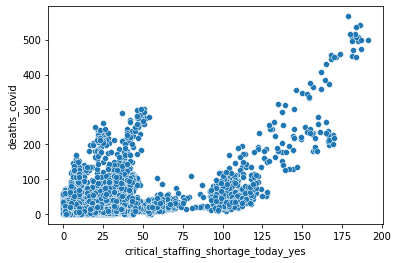

In [55]:
#relacion de muertes con falta de personal medico
sns.scatterplot(data=deaths_staffing_shortage_2021,x='critical_staffing_shortage_today_yes',y='deaths_covid')

<AxesSubplot:xlabel='critical_staffing_shortage_anticipated_within_week_yes', ylabel='deaths_covid'>

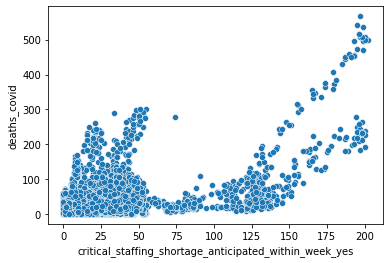

In [56]:
#relacion de muertes con falta de personal medico anticipada
sns.scatterplot(data=deaths_staffing_shortage_2021,x='critical_staffing_shortage_anticipated_within_week_yes',y='deaths_covid')

In [57]:
deaths_staffing_shortage_2021.corr()

,deaths_covid,critical_staffing_shortage_today_yes,critical_staffing_shortage_anticipated_within_week_yes
deaths_covid,1.000000,0.574972,0.566845
critical_staffing_shortage_today_yes,0.574972,1.000000,0.983835
critical_staffing_shortage_anticipated_within_week_yes,0.566845,0.983835,1.000000


Si bien se puede observar cierta correlacion lineal de las muertes por COVID con la falta de personal medico, esta no es muy fuerte. Si estan muy relacionadas la falta de personal en el dia con la falta de personal anticipada

## 8 - Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.

In [58]:
#columnas que me interesan
cols = ['date','deaths_covid','adult_icu_bed_covid_utilization']

In [59]:
df_month = df[cols]

In [60]:
df_month['month'] = df_month.date.dt.month
df_month['year'] = df_month.date.dt.year

C:\Users\jalil\AppData\Local\Temp\ipykernel_14224\3979638343.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jalil\AppData\Local\Temp\ipykernel_14224\3979638343.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
#agrupo por mes
deaths_month = df_month[['date','deaths_covid']].groupby(pd.Grouper(key="date", freq="M")).sum()

In [62]:
#creo columna mes
deaths_month['month'] = deaths_month.index.strftime('%b%Y')

In [63]:
f = px.bar(deaths_month,x='month',y='deaths_covid')
f.show()


Si solo tenemos en cuenta las muertes, el peor mes fue ENE/2021

In [64]:
#agrupo por mes y promedio la ocupacion de ICU
icu_utilization_avg_month = df_month[['date','adult_icu_bed_covid_utilization']].groupby(pd.Grouper(key="date", freq="M")).mean()

In [65]:
#creo columna mes
icu_utilization_avg_month['month'] = icu_utilization_avg_month.index.strftime('%b%Y')

In [66]:
f = px.bar(icu_utilization_avg_month,x='month',y='adult_icu_bed_covid_utilization')
f.show()
"""
f = plt.figure(figsize=(20, 6))
ax = sns.barplot(data=icu_utilization_avg_month,x='month',y='adult_icu_bed_covid_utilization',color='grey')
sns.set_style("darkgrid")
sns.despine()
plt.xticks(rotation=45)
plt.show()
"""

'\nf = plt.figure(figsize=(20, 6))\nax = sns.barplot(data=icu_utilization_avg_month,x=\'month\',y=\'adult_icu_bed_covid_utilization\',color=\'grey\')\nsns.set_style("darkgrid")\nsns.despine()\nplt.xticks(rotation=45)\nplt.show()\n'

Creo que esto es muy representativo de la situacion, si bien los maximos promedios mensuales de utilizacion de terapias intensivas ocurrieron durante los inviernos estadounidenses estos nunca superaron el 30% de capacidad, por lo que creo que la situacion nunca estuvo descontrolada para los pacientes graves.

Teniendo en cuenta ambos graficos, mantengo que enero de 2021 fue el peor mes de la pandemia en USA, si bien hay muchas otras variables que se pueden tener en cuenta, creo que lo que las que realmente son "termometros" de la situacion son la cantidad de muertes y el porcentaje de capacidad de terapia intensiva.

## 9 - ¿Qué recomendaciones haría, ex post, con respecto a los recursos hospitalarios y su uso?

Mi recomendación principal es ponderar todas las métricas por cantidad de habitantes, algunas cifras de muertes por coronavirus de los estados más poblados realmente asustan, pero en lugares pequeños con muchos menos decesos totales la situación podría estar mucho peor, porque representan un porcentaje más alto de su población.
Evidentemente cuarentenas de medio / corto plazo como la implementada en New York provocan un alivio al sistema hospitalario, podria ser buena idea implementarlas intermitentemente, sobre todo en otoño o invierno.
En promedios mensuales los sistemas de salud no estuvieron colapsados, aunque hubo ciertos dias puntuales que no dieron a basto, tener un plan para agrandar la capacidad rápidamente por corto plazo podria solucionar este problema.
Lo que no haría es descuidar la atención de otras enfermedades, podrian provocar más muertes.